## Keras

**`Keras`** es una librería escrita en Python, diseñada específicamente para hacer experimentos con redes neuronales. Permite crear prototipos rápidamente y de manera fácil, pues está pensada para que sea fácil de usar.

```html
pip install tensorflow
pip install keras
```

_**Documentación**: https://keras.io/guides/sequential_model/_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras

# Dataset
from keras.datasets import mnist

from keras.models import Sequential 
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

In [2]:
keras.__version__

'2.9.0'

In [3]:
# Descargamos el dataset
# MNIST es un dataset de imagenes de numeros en escala de grises

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

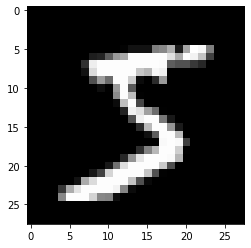

In [5]:
plt.imshow(X_train[0], cmap = "gray")
plt.show()

In [6]:
y_train[0]

5

In [7]:
# Train
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
# Test
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
# Para adaptar cada imagen a la red neuronal debemos transformalo en un vector, es decir, un elemento de 1 columna.

# flatten 
num_pixels = X_train.shape[1] * X_train.shape[2] 

# # Train
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32") # flatten training images

# # Test
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32") # flatten test images

In [10]:
num_pixels

784

### Normalizacion

In [11]:
# Como tratamos con imagenes y el valor maximo es 255
# Dividimos todos los valores por 255

X_train = X_train / 255
X_test = X_test / 255

### One Hot Encoding

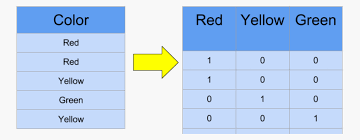

In [12]:
y_train[2]

4

In [13]:
# One Hot Encoding 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
num_classes = len(y_train[0])
num_classes

10

### Neural Network

In [16]:
# Inicializamos el modelo
model = Sequential()

# Capa de Entrada
model.add(Flatten(input_shape = (X_train.shape[1], X_train.shape[2])))

# Capas Ocultas
model.add(Dense(784, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation = "tanh"))
model.add(Dropout(0.2))

# Capa de Salida (Si es un problema de clasificación multiple siempre debe terminar con "softmax")
model.add(Dense(num_classes, activation = "softmax"))

# Compilamos el modelo
model.compile(optimizer = "adam",
              loss      = "categorical_crossentropy",
              metrics   = ["AUC"])

In [17]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trai

In [18]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3, verbose = 1)

# Metricas
scores = model.evaluate(X_test, y_test, verbose = 1)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2051 - auc: 0.9958 - val_loss: 0.0951 - val_auc: 0.9982
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0984 - auc: 0.9984 - val_loss: 0.0773 - val_auc: 0.9987
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - auc: 0.9986


In [19]:
scores

[0.07640297710895538, 0.9986268281936646]

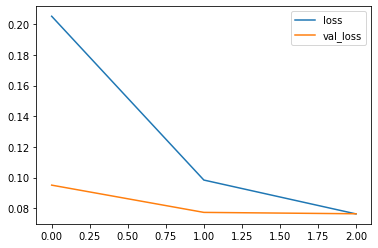

In [20]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

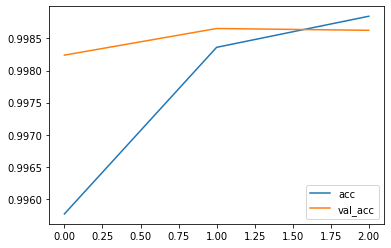

In [23]:
# auc
plt.plot(history.history["auc"], label = "acc")
plt.plot(history.history["val_auc"], label = "val_acc")
plt.legend()
plt.show()

In [24]:
yhat = model.predict(X_test)
yhat

313/313 [==============================] - 1s 2ms/step


array([[8.3542818e-06, 9.4743546e-06, 2.0352840e-04, ..., 9.9899656e-01,
        1.3746311e-05, 1.3444672e-04],
       [8.1829485e-06, 1.4439839e-03, 9.9813449e-01, ..., 3.8030698e-06,
        4.7745219e-05, 2.5133079e-07],
       [8.6280565e-08, 9.9997878e-01, 2.0513985e-06, ..., 9.0797412e-06,
        5.5955525e-06, 8.2450498e-08],
       ...,
       [1.1901279e-07, 6.6535258e-06, 2.7531374e-07, ..., 3.8314771e-05,
        3.2492648e-05, 8.4331579e-04],
       [1.5658041e-07, 4.1816484e-06, 8.7022059e-08, ..., 1.7146293e-07,
        3.9265666e-05, 1.3802876e-06],
       [1.8115235e-05, 2.9709904e-07, 1.0061924e-06, ..., 1.7619877e-08,
        3.3329427e-06, 2.6746602e-07]], dtype=float32)

In [25]:
yhat[0]

array([8.3542818e-06, 9.4743546e-06, 2.0352840e-04, 5.8164931e-04,
       3.0486126e-07, 5.1964889e-05, 2.8183480e-08, 9.9899656e-01,
       1.3746311e-05, 1.3444672e-04], dtype=float32)

In [26]:
np.argmax(yhat[0])

7

In [27]:
yhat = np.array([np.argmax(i) for i in yhat])
# y_hat

In [28]:
y_test = np.array([np.argmax(i) for i in y_test])
# y_test

In [ ]:
confusion_matrix(y_test, yhat)

array([[ 969,    0,    0,    1,    0,    2,    1,    1,    3,    3],
       [   0, 1134,    0,    0,    0,    0,    1,    0,    0,    0],
       [   3,    3, 1005,    9,    1,    0,    1,    5,    5,    0],
       [   0,    1,    4,  979,    0,   19,    0,    2,    2,    3],
       [   1,    2,    1,    1,  945,    0,    8,    2,    1,   21],
       [   2,    0,    0,    4,    1,  879,    2,    0,    2,    2],
       [   8,    4,    0,    0,    1,    6,  939,    0,    0,    0],
       [   0,   12,    9,    6,    0,    0,    0,  992,    2,    7],
       [   4,    2,    1,    3,    2,    8,    3,    1,  948,    2],
       [   0,    6,    0,    3,    7,    5,    2,    5,    4,  977]],
      dtype=int64)

In [30]:
print(f"Accuracy: {scores[1]}\nError: {1 - scores[1]}")

Accuracy: 0.9986268281936646
Error: 0.0013731718063354492


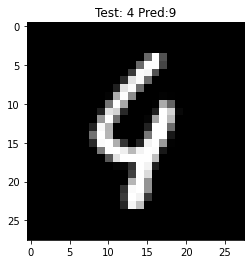

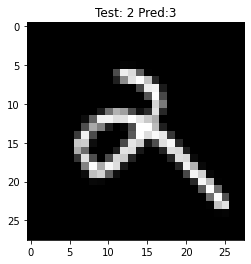

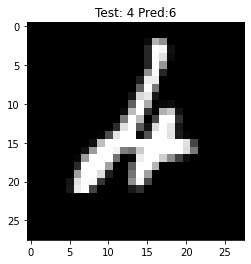

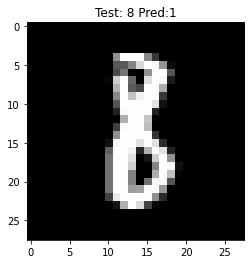

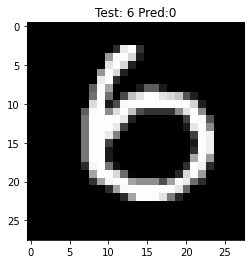

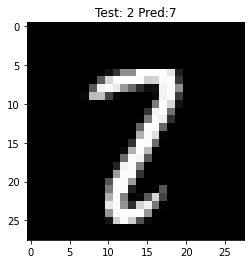

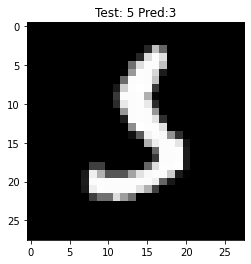

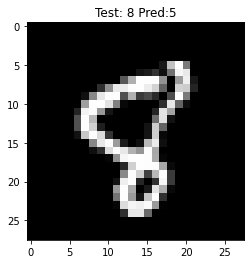

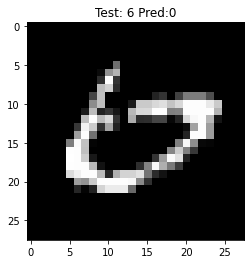

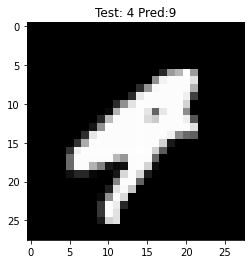

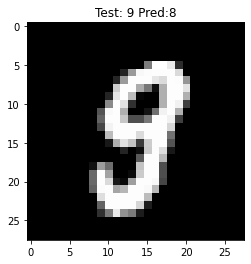

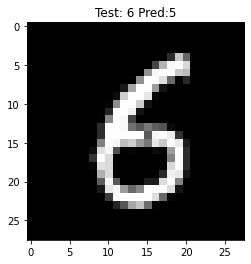

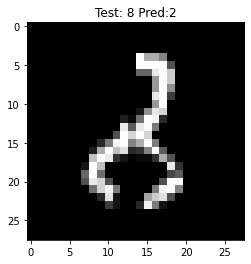

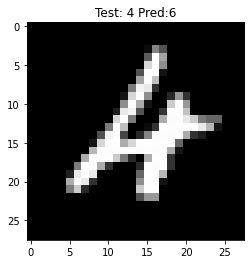

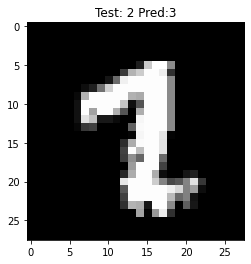

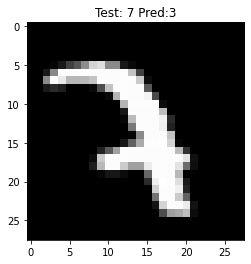

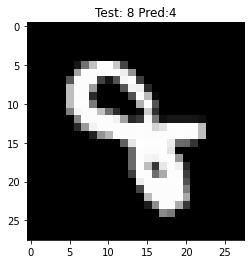

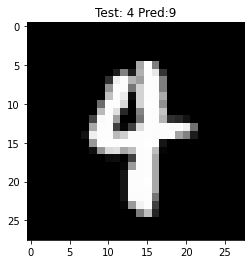

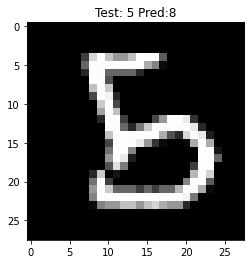

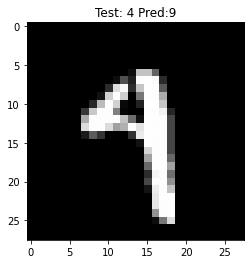

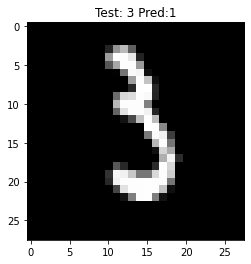

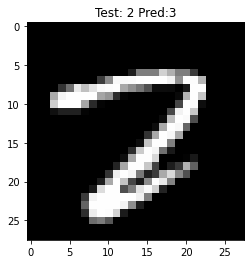

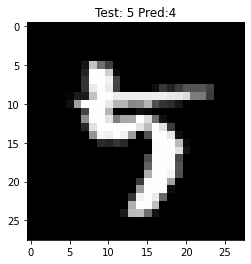

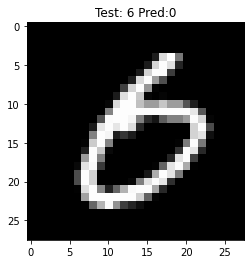

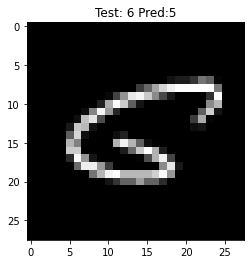

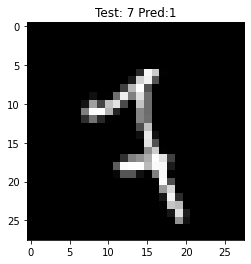

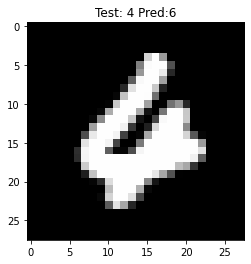

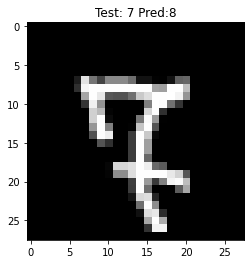

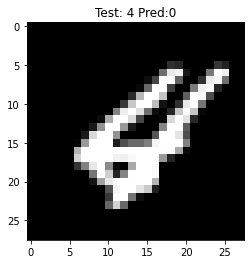

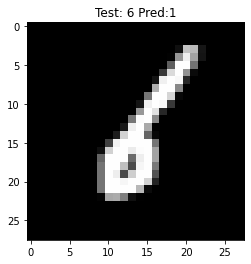

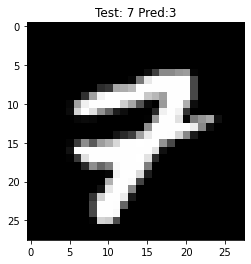

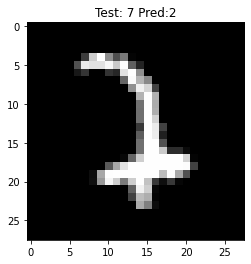

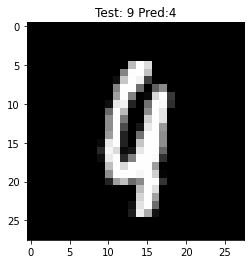

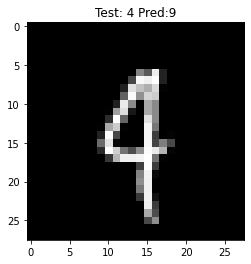

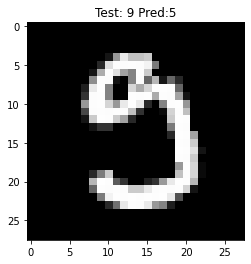

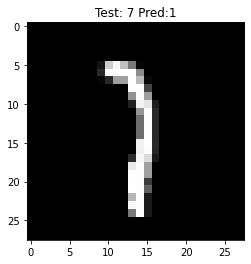

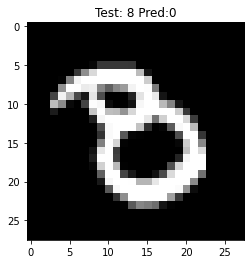

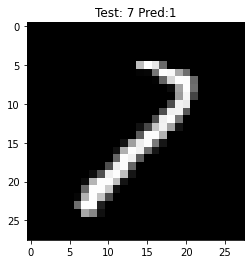

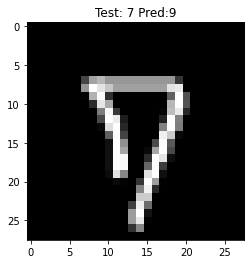

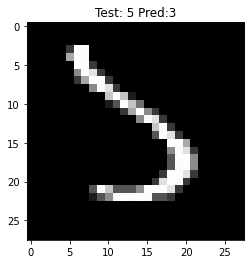

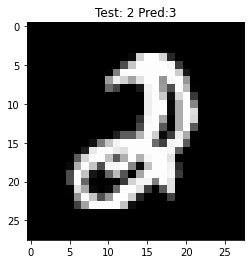

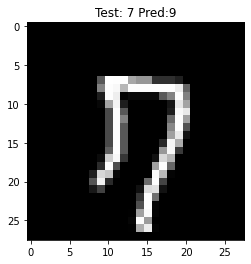

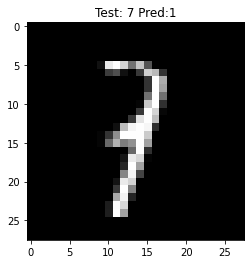

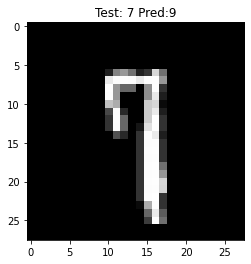

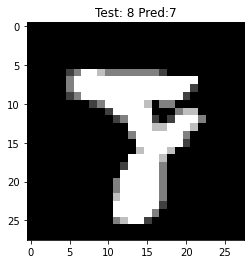

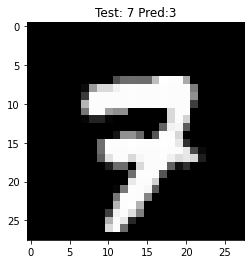

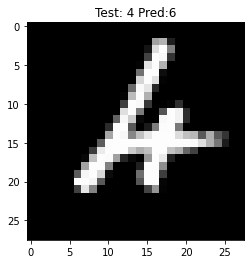

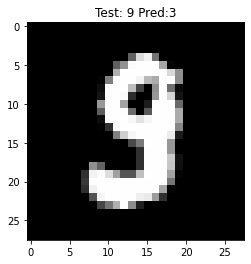

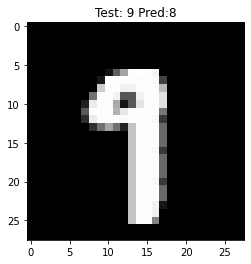

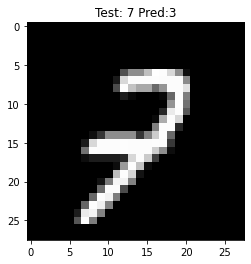

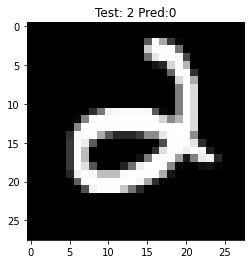

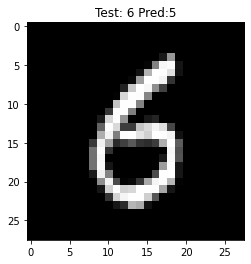

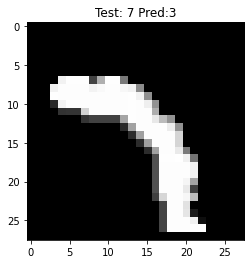

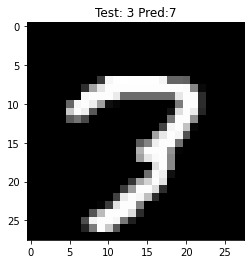

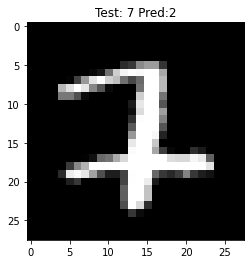

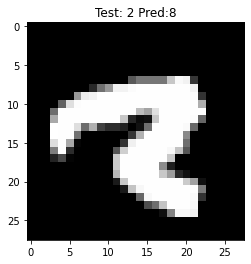

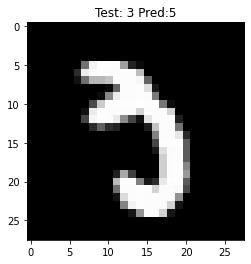

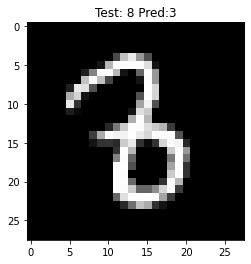

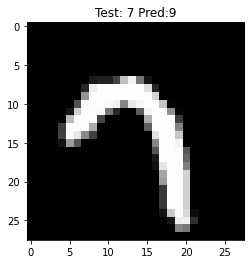

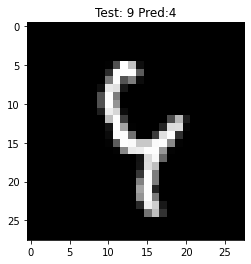

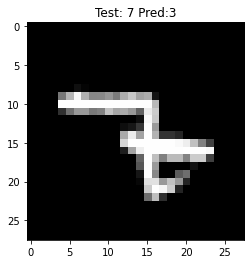

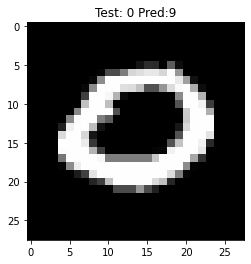

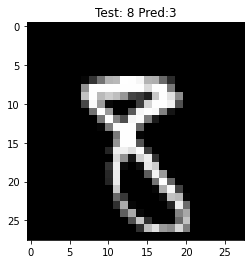

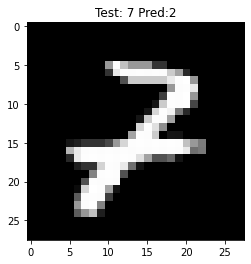

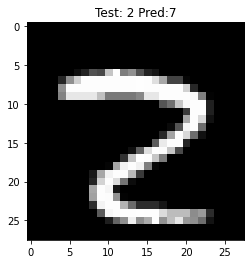

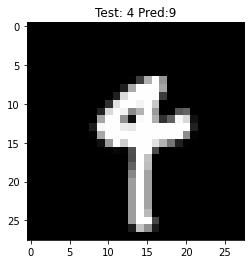

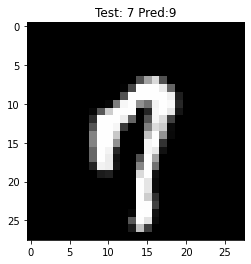

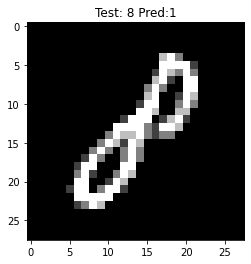

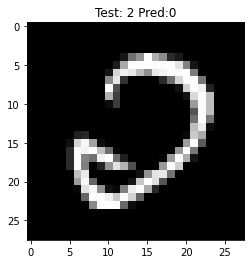

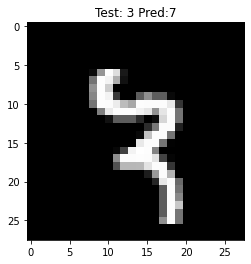

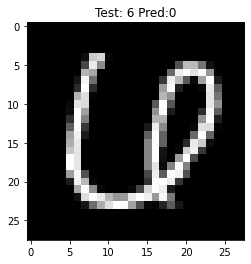

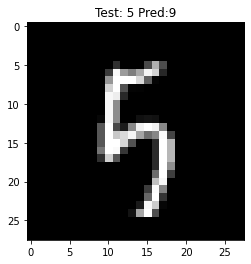

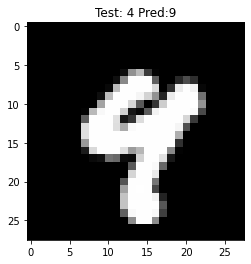

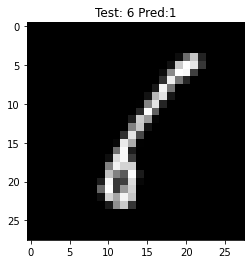

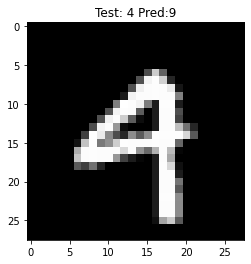

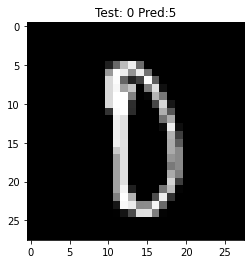

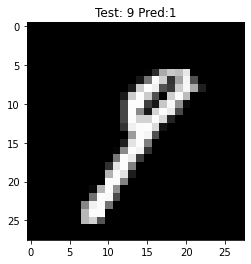

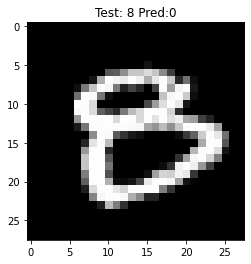

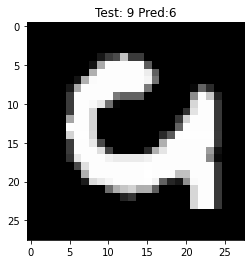

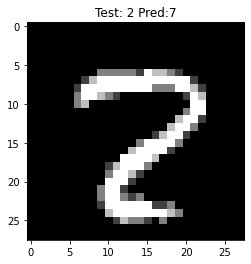

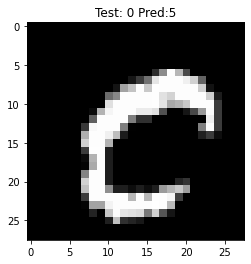

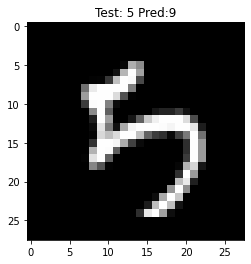

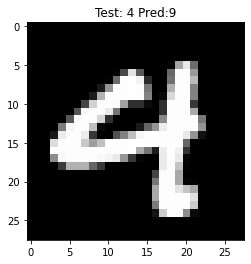

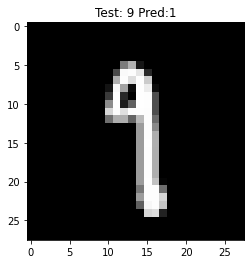

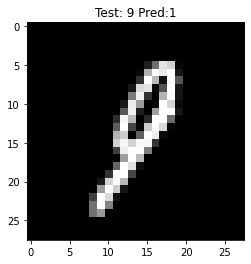

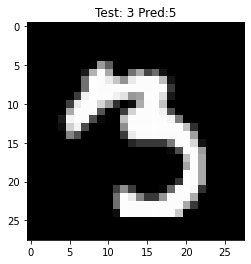

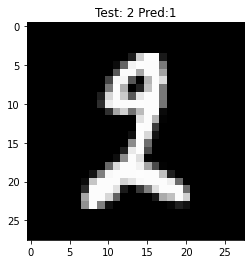

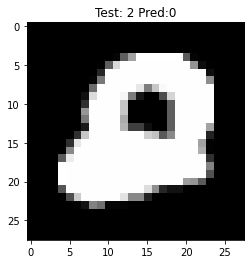

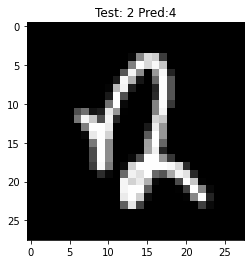

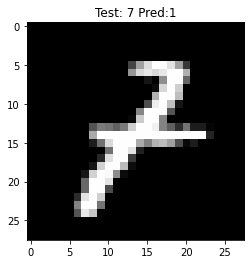

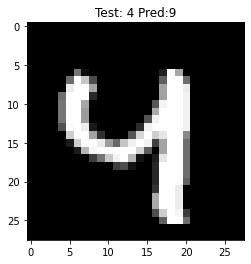

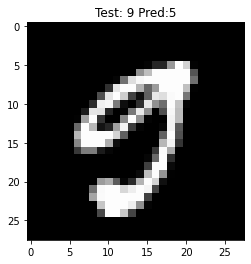

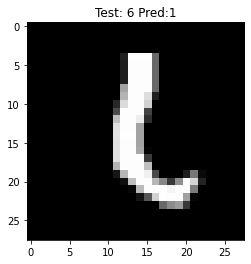

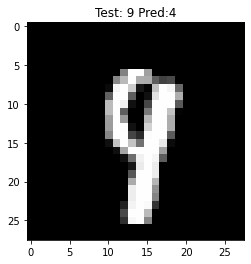

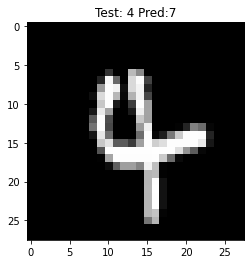

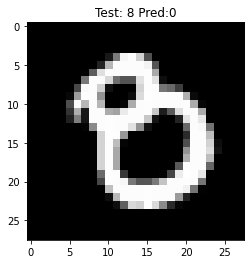

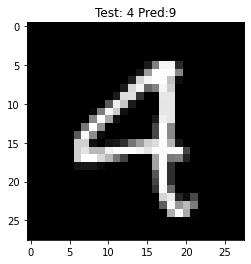

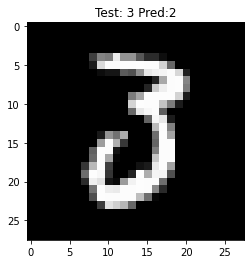

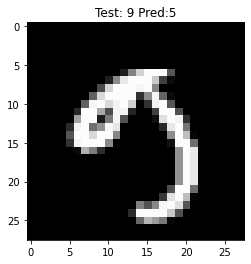

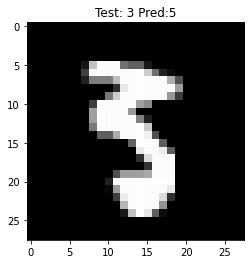

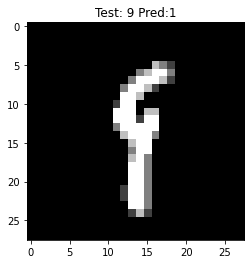

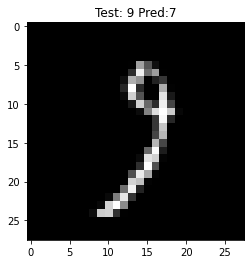

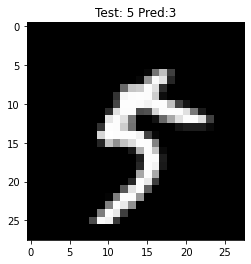

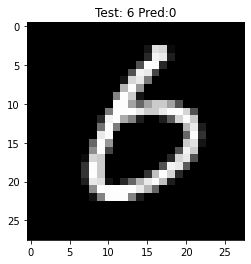

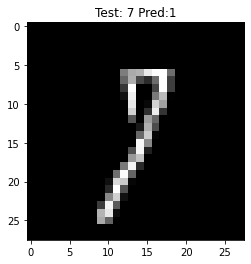

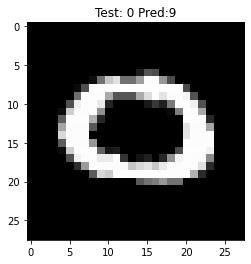

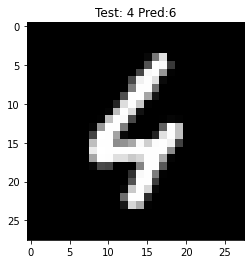

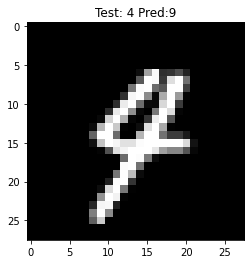

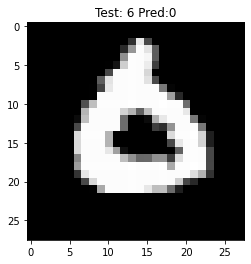

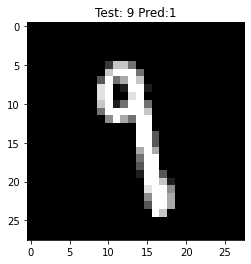

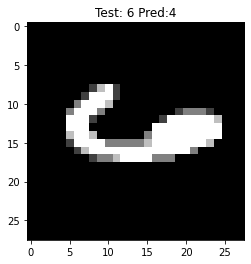

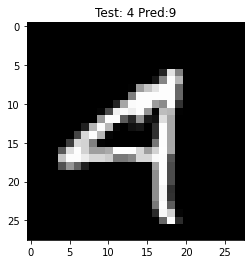

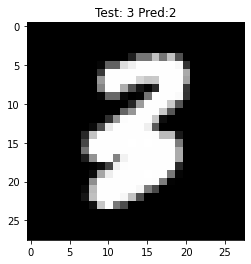

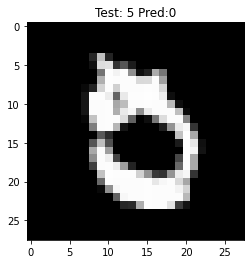

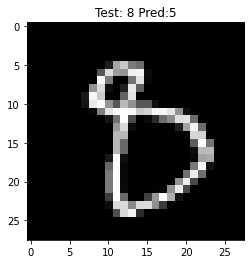

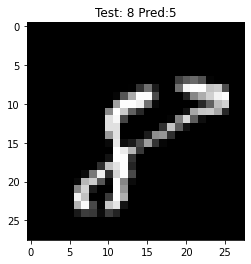

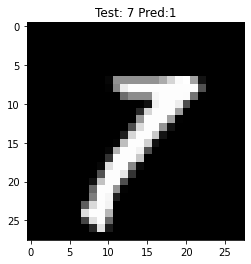

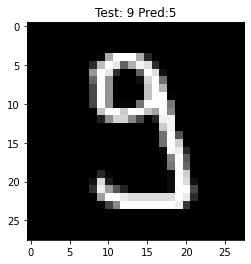

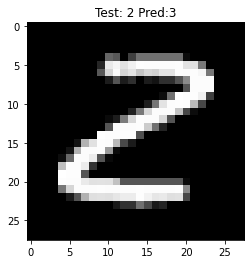

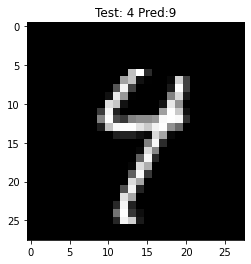

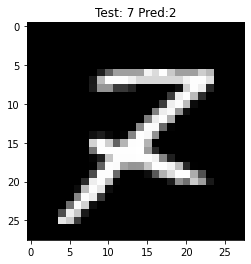

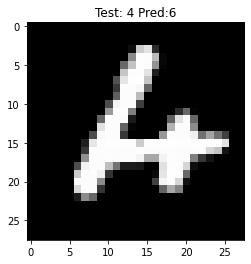

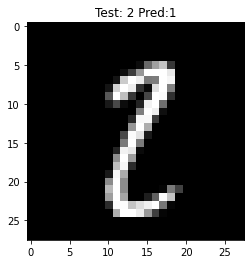

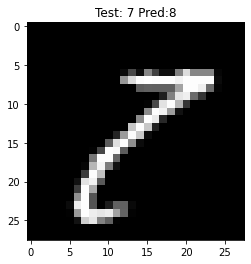

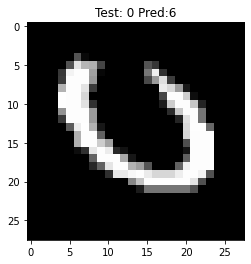

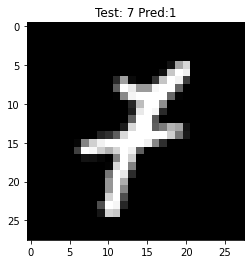

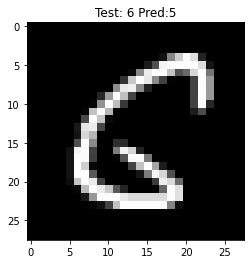

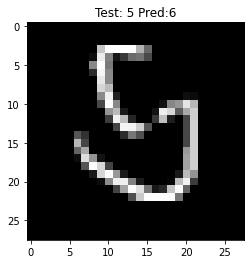

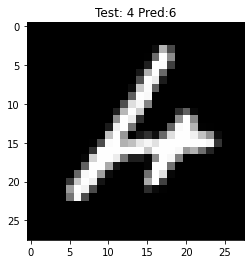

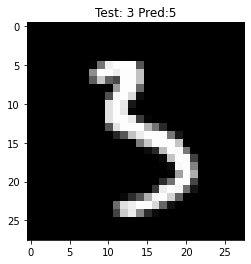

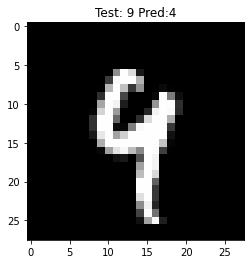

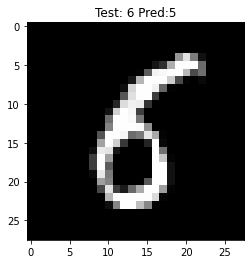

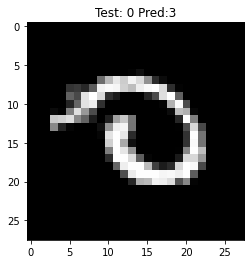

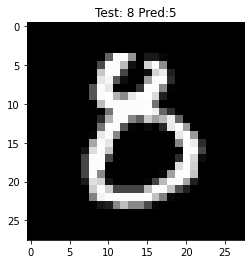

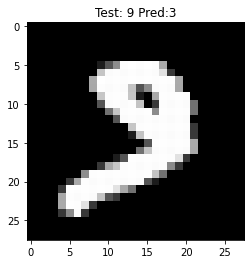

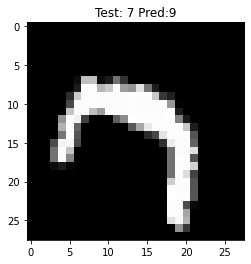

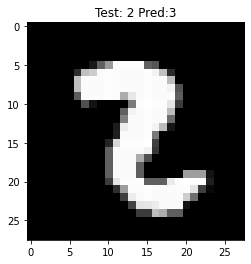

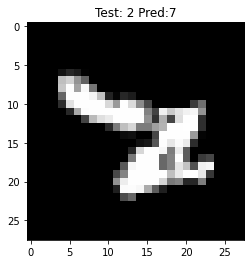

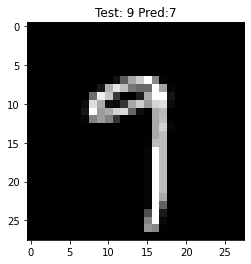

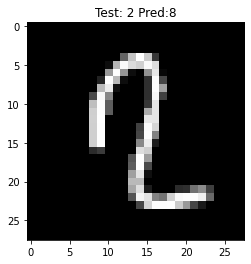

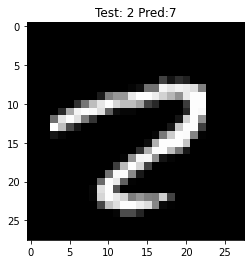

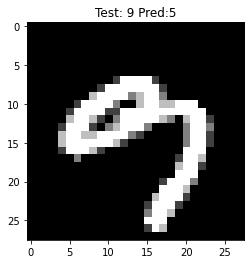

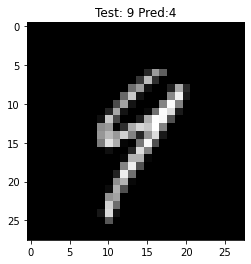

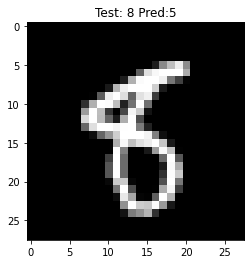

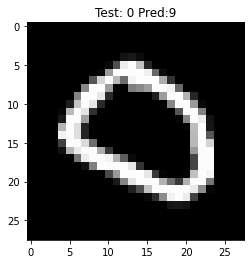

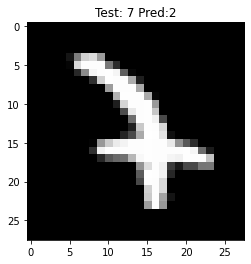

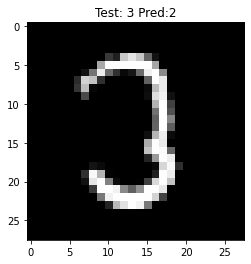

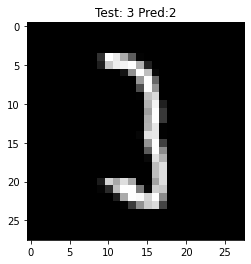

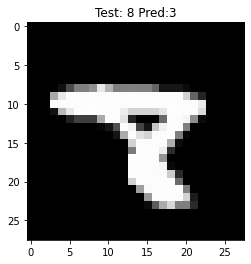

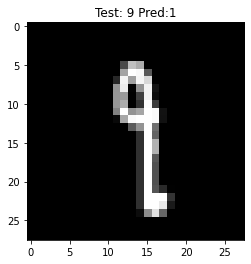

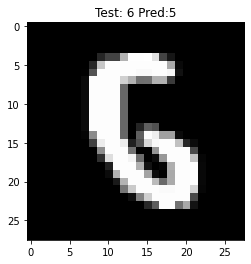

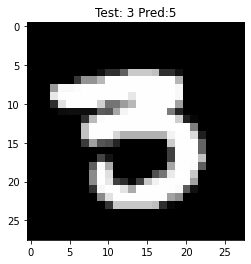

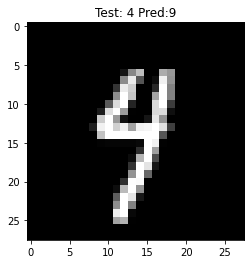

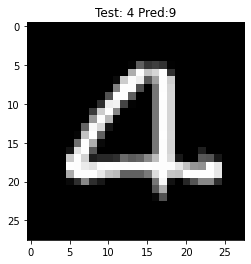

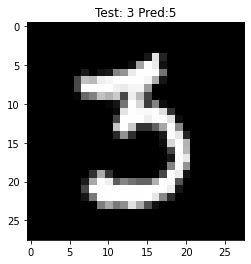

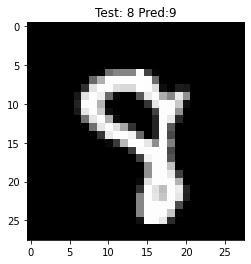

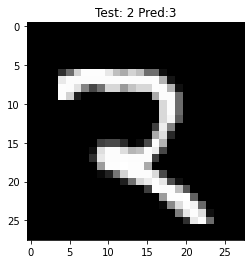

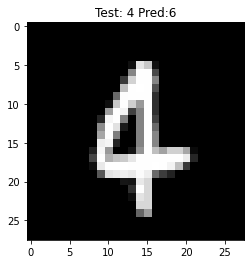

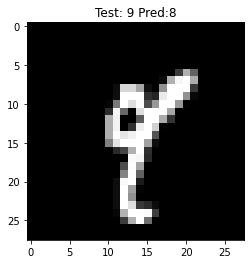

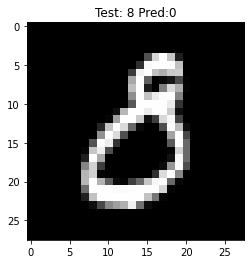

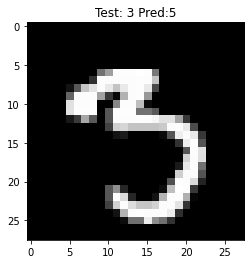

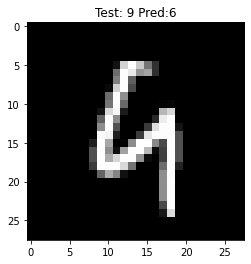

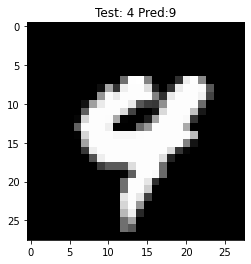

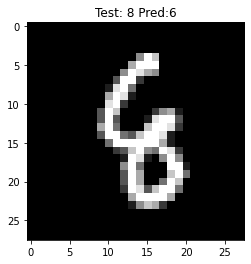

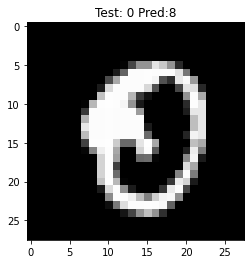

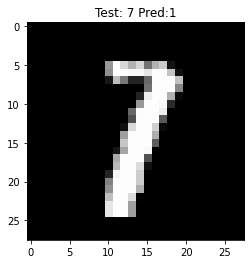

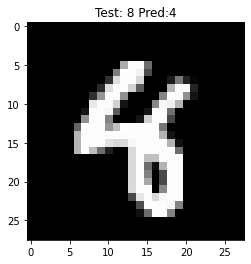

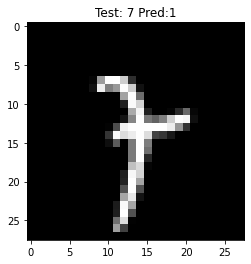

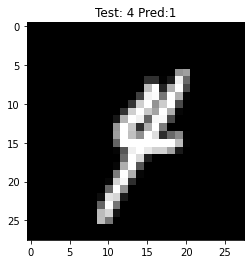

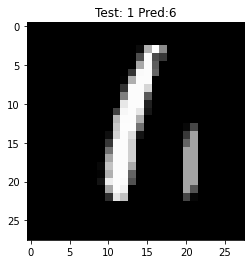

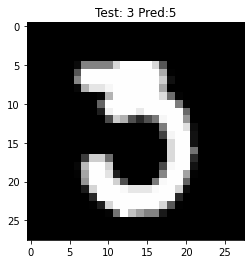

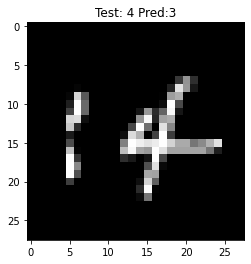

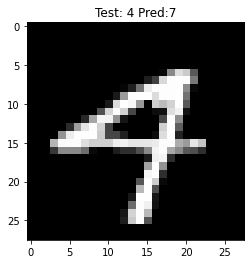

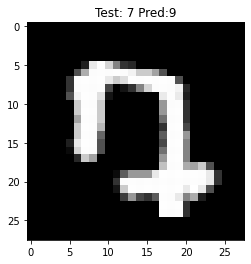

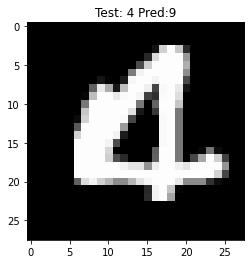

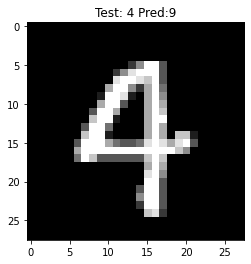

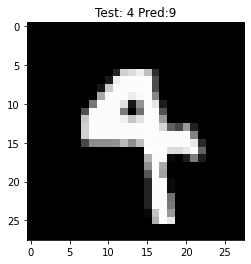

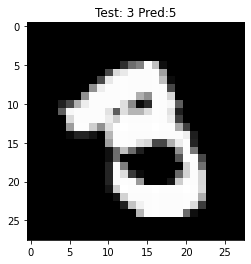

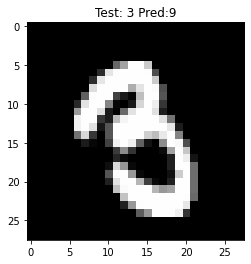

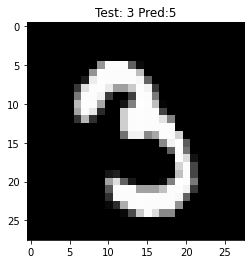

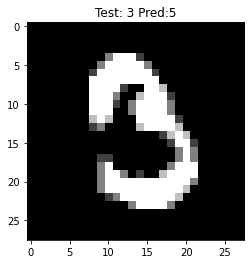

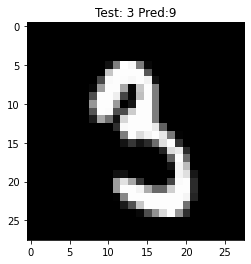

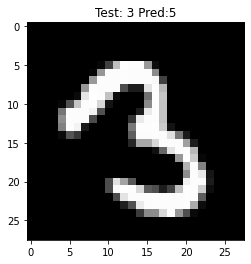

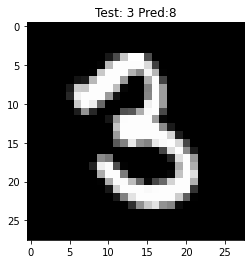

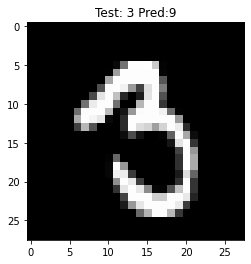

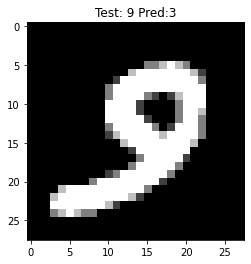

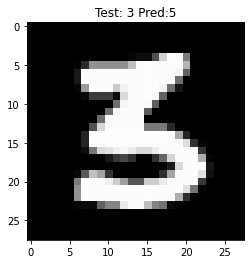

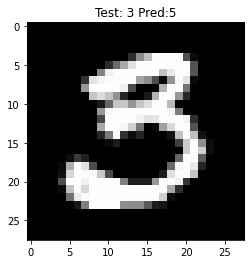

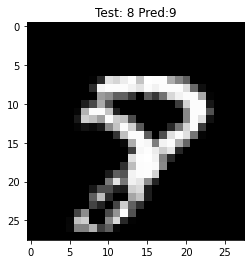

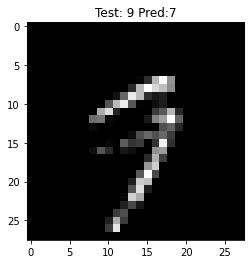

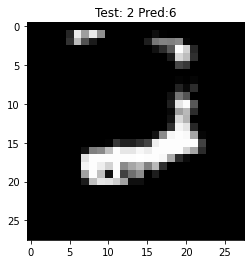

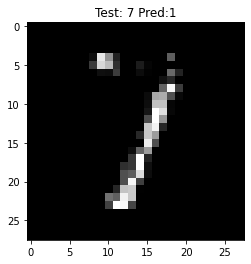

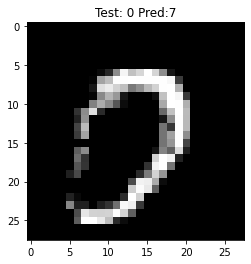

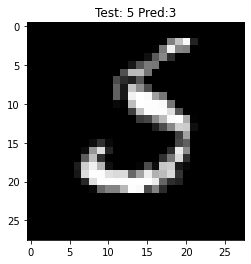

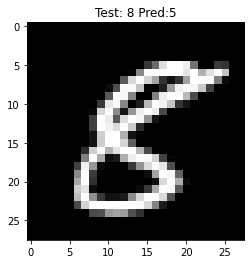

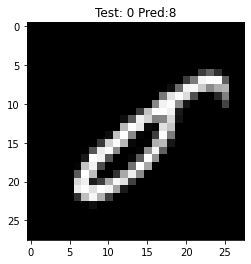

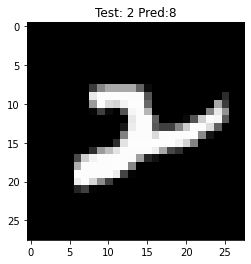

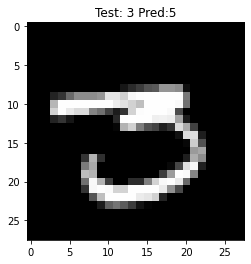

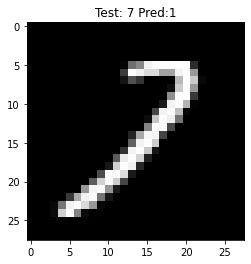

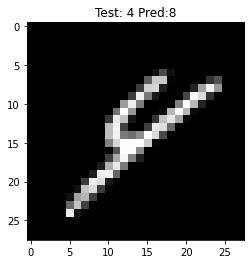

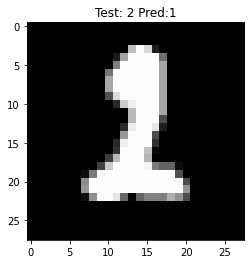

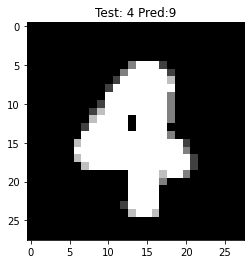

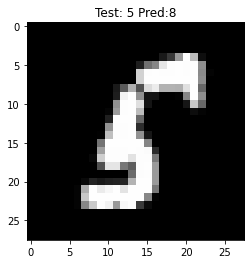

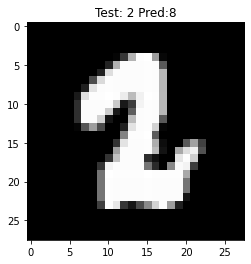

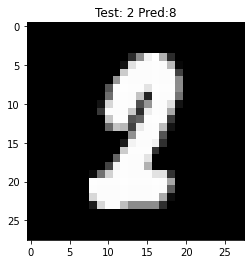

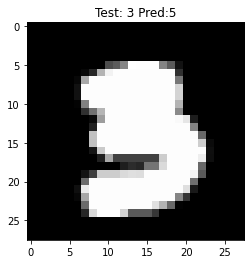

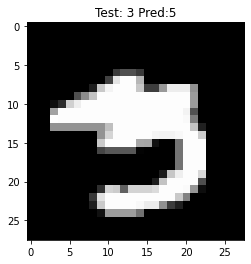

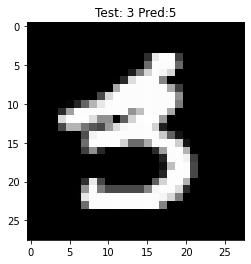

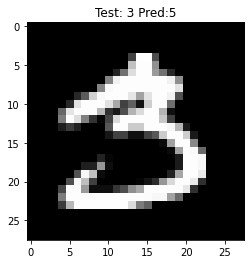

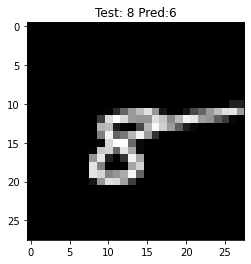

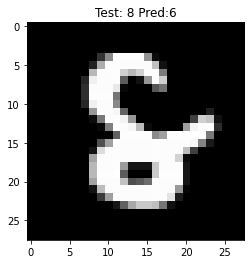

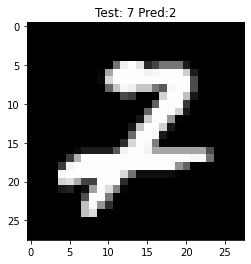

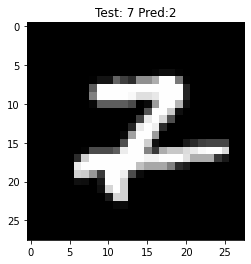

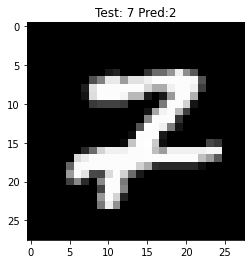

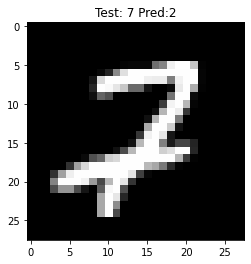

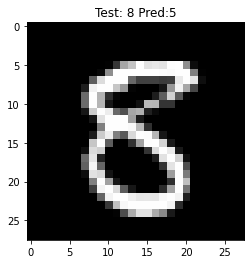

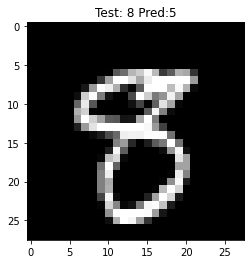

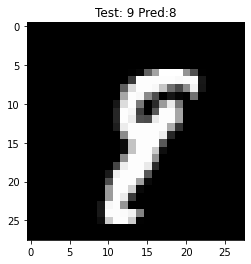

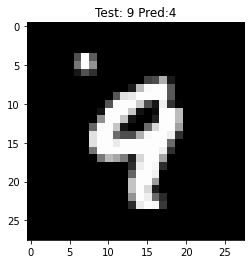

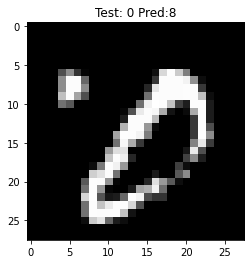

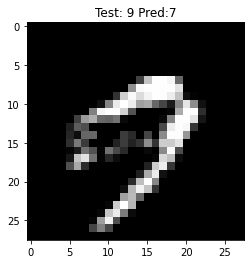

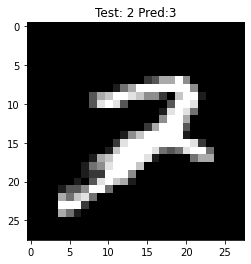

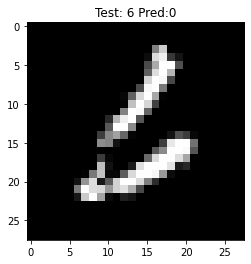

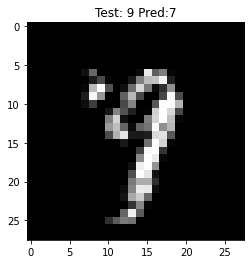

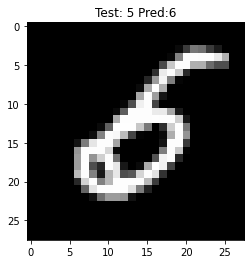

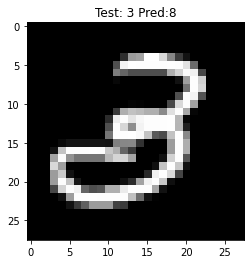

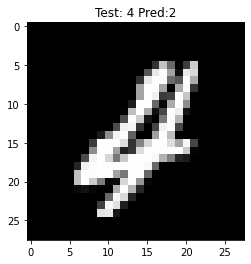

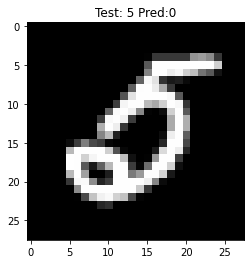

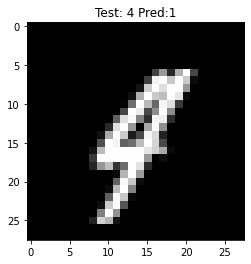

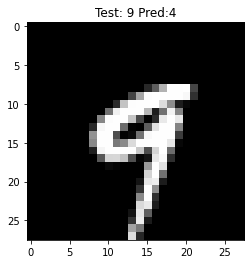

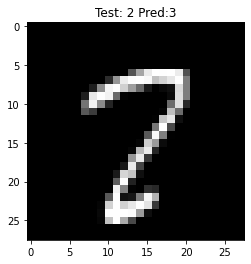

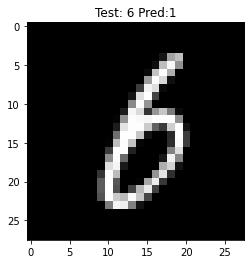

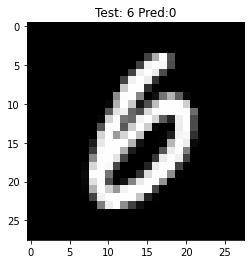

In [31]:
errores = np.where(y_test != yhat)[0]

for e in errores:
    
    plt.imshow(X_test[e], cmap = "gray")
    plt.title(f"Test: {y_test[e]} Pred:{yhat[e]}")
    plt.show()

In [32]:
np.where(y_test != yhat)

(array([ 115,  149,  247,  257,  259,  321,  340,  403,  445,  447,  448,
         457,  582,  610,  659,  684,  691,  707,  720,  740,  795,  924,
         951,  965, 1014, 1039, 1112, 1156, 1178, 1181, 1194, 1226, 1232,
        1242, 1247, 1260, 1319, 1326, 1328, 1393, 1395, 1494, 1500, 1522,
        1530, 1543, 1549, 1553, 1554, 1581, 1609, 1626, 1671, 1681, 1754,
        1790, 1828, 1878, 1883, 1901, 1903, 1987, 2004, 2016, 2044, 2053,
        2070, 2093, 2098, 2109, 2118, 2125, 2130, 2135, 2148, 2185, 2189,
        2272, 2293, 2299, 2326, 2369, 2371, 2387, 2406, 2408, 2433, 2462,
        2488, 2607, 2630, 2648, 2654, 2720, 2877, 2896, 2907, 2921, 2939,
        2953, 3005, 3060, 3117, 3130, 3225, 3251, 3377, 3405, 3422, 3503,
        3520, 3533, 3549, 3558, 3559, 3567, 3580, 3597, 3681, 3718, 3767,
        3780, 3796, 3808, 3818, 3838, 3853, 3893, 3941, 3943, 3985, 4063,
        4065, 4075, 4078, 4102, 4156, 4176, 4224, 4248, 4289, 4294, 4369,
        4380, 4403, 4433, 4437, 4443, 

In [33]:
# Guardar Modelo
model.save("kmnist_modelo.h5")

In [34]:
# Cargar un modelo

from keras.models import load_model

modelo_preentrenado = load_model("kmnist_modelo.h5")

modelo_preentrenado.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[8.3542818e-06, 9.4743546e-06, 2.0352840e-04, ..., 9.9899656e-01,
        1.3746311e-05, 1.3444672e-04],
       [8.1829485e-06, 1.4439839e-03, 9.9813449e-01, ..., 3.8030698e-06,
        4.7745219e-05, 2.5133079e-07],
       [8.6280565e-08, 9.9997878e-01, 2.0513985e-06, ..., 9.0797412e-06,
        5.5955525e-06, 8.2450498e-08],
       ...,
       [1.1901279e-07, 6.6535258e-06, 2.7531374e-07, ..., 3.8314771e-05,
        3.2492648e-05, 8.4331579e-04],
       [1.5658041e-07, 4.1816484e-06, 8.7022059e-08, ..., 1.7146293e-07,
        3.9265666e-05, 1.3802876e-06],
       [1.8115235e-05, 2.9709904e-07, 1.0061924e-06, ..., 1.7619877e-08,
        3.3329427e-06, 2.6746602e-07]], dtype=float32)

In [ ]:
################################################################################################################################